# Solving ordinary differential equations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pandas import Series
from pandas import DataFrame
pd.options.display.float_format = '{:.8f}'.format

## Определение границ интервала, шага h, ОДУ и ее производную, таблицу, где будут храниться решения ОДУ

In [3]:
a, b = (1,2)
h = 0.1
def u(x,y):
    return -(y/x)*np.log(y/x)
def u_der(x,y):
    return -(np.log(y/x)+1)/x
def answ(x):
    return x*np.exp((1-x)/x)
solution = DataFrame(data = {"ui" : [answ(a+i*h) for i in range(0,int(1/h + 1))],
                            "xi": [a+i*h for i in range(0,int(1/h + 1))],
                            "yi-M1" : np.concatenate(( [1],np.zeros(int(1/h)) )),
                             "yi-M2" : np.concatenate(([1],np.zeros(int(1/h)))),
                             "yi-M3" : np.concatenate(([1],np.zeros(int(1/h)))),
                            "f(x,y)" : np.zeros(int(1/h+1))})
solution.loc[0,"f(x,y)"] = u(solution.loc[0,"xi"], solution.loc[0,"yi-M1"])
solution

,ui,xi,yi-M1,yi-M2,yi-M3,"f(x,y)"
0,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,-0.00000000
1,1.00441079,1.10000000,0.00000000,0.00000000,0.00000000,0.00000000
2,1.01577807,1.20000000,0.00000000,0.00000000,0.00000000,0.00000000
3,1.03209946,1.30000000,0.00000000,0.00000000,0.00000000,0.00000000
4,1.05206821,1.40000000,0.00000000,0.00000000,0.00000000,0.00000000
5,1.07479697,1.50000000,0.00000000,0.00000000,0.00000000,0.00000000
6,1.09966285,1.60000000,0.00000000,0.00000000,0.00000000,0.00000000
7,1.12621623,1.70000000,0.00000000,0.00000000,0.00000000,0.00000000
8,1.15412470,1.80000000,0.00000000,0.00000000,0.00000000,0.00000000
9,1.18313734,1.90000000,0.00000000,0.00000000,0.00000000,0.00000000


## Определение итерационного метода Ньютона и неявного метода трапеций

In [4]:
def iterNewton(i):
    y0 = solution.loc[i-1, "yi-M1"]
    yk = y0
    x0 = solution.loc[i-1, "xi"]
    xk = solution.loc[i, "xi"]
    f0 = solution.loc[i-1, "f(x,y)"]
    while True:
        yk1 = yk - (yk - y0 - h/2 * (f0 + u(xk,yk)))/(1 - h/2 * u_der(xk,yk))
        if abs(yk1 - yk) <= 10**(-10):
            solution.loc[i, "yi-M1"] = yk1
            solution.loc[i, "f(x,y)"] = u(xk, yk1)
            return
        else:
            yk = yk1

In [5]:
def ITM():
    for i in range(1,int(1/h+1)):
        iterNewton(i)
ITM()
E1 = np.max(np.abs(solution["ui"] - solution["yi-M1"]))
E1

0.0005635706435682675

## Определение явного метода средних прямоугольников

In [6]:
def EMM():
    for i in range(0,int(1/h)):
        xi = solution.loc[i,"xi"]
        yi = solution.loc[i, "yi-M2"]
        k1 = u(xi,yi)
        k2 = u(xi+h/2, yi + h/2*k1)
        solution.loc[i+1,"yi-M2"] = yi + h*k2
EMM()
E2 = np.max(np.abs(solution["ui"] - solution["yi-M2"]))
E2

0.0004984614918566166

## Определение явного и неявного методов Адамса 2-го порядка и предиктор-корректорного метода

In [7]:
def explAdams(i):
    yi1 = solution.loc[i-1, "yi-M3"]
    yi = solution.loc[i, "yi-M3"]
    xi1 = solution.loc[i-1, "xi"]
    xi  = solution.loc[i, "xi"]
    solution.loc[i+1,"yi-M3"] = yi + h*(3/2*u(xi, yi) - 1/2*u(xi1, yi1))

In [8]:
def implAdams(i):
    yi1 = solution.loc[i+1, "yi-M3"]
    yi = solution.loc[i, "yi-M3"]
    xi1 = solution.loc[i+1, "xi"]
    xi  = solution.loc[i, "xi"]
    solution.loc[i+1,"yi-M3"] = yi + h/2*(u(xi1,yi1) + u(xi, yi))

In [9]:
def predCorr():
    solution.loc[1, "yi-M3"] = solution.loc[1, "yi-M2"]
    for i in range(1,int(1/h)):
        explAdams(i)
        implAdams(i)
predCorr()
E3 = np.max(np.abs(solution["ui"] - solution["yi-M3"]))
E3

0.0003173518135086706

## Вычисление погрешности по правилу Рунге

In [10]:
#solutionx2 = solution

def Runge():
    R1 = np.max(np.abs(solutionx2.loc[range(0,11,2),"yi-M1"] - np.array(solution.loc[range(0,6), "yi-M1"]))) / 3
    R2 = np.max(np.abs(solutionx2.loc[range(0,11,2),"yi-M2"] - np.array(solution.loc[range(0,6), "yi-M2"]))) / 3
    R3 = np.max(np.abs(solutionx2.loc[range(0,11,2),"yi-M3"] - np.array(solution.loc[range(0,6), "yi-M3"]))) / 3 
    return np.array([np.NAN, np.NAN, R1, R2, R3])
#RungeErr = Runge()
RungeErr

NameError: name 'RungeErr' is not defined

## Построение нужных графиков

In [11]:
font = {"size" : 24}
matplotlib.rc('font', **font)
def paintGraph(ax,i):
    ax.plot(solution.xi, solution["yi-M"+str(i)], color="blue", label = "Approximate", alpha = 0.9)
    ax.plot(solution.xi, answ(solution.xi), color = "red", label = "Original function", alpha = 0.5)

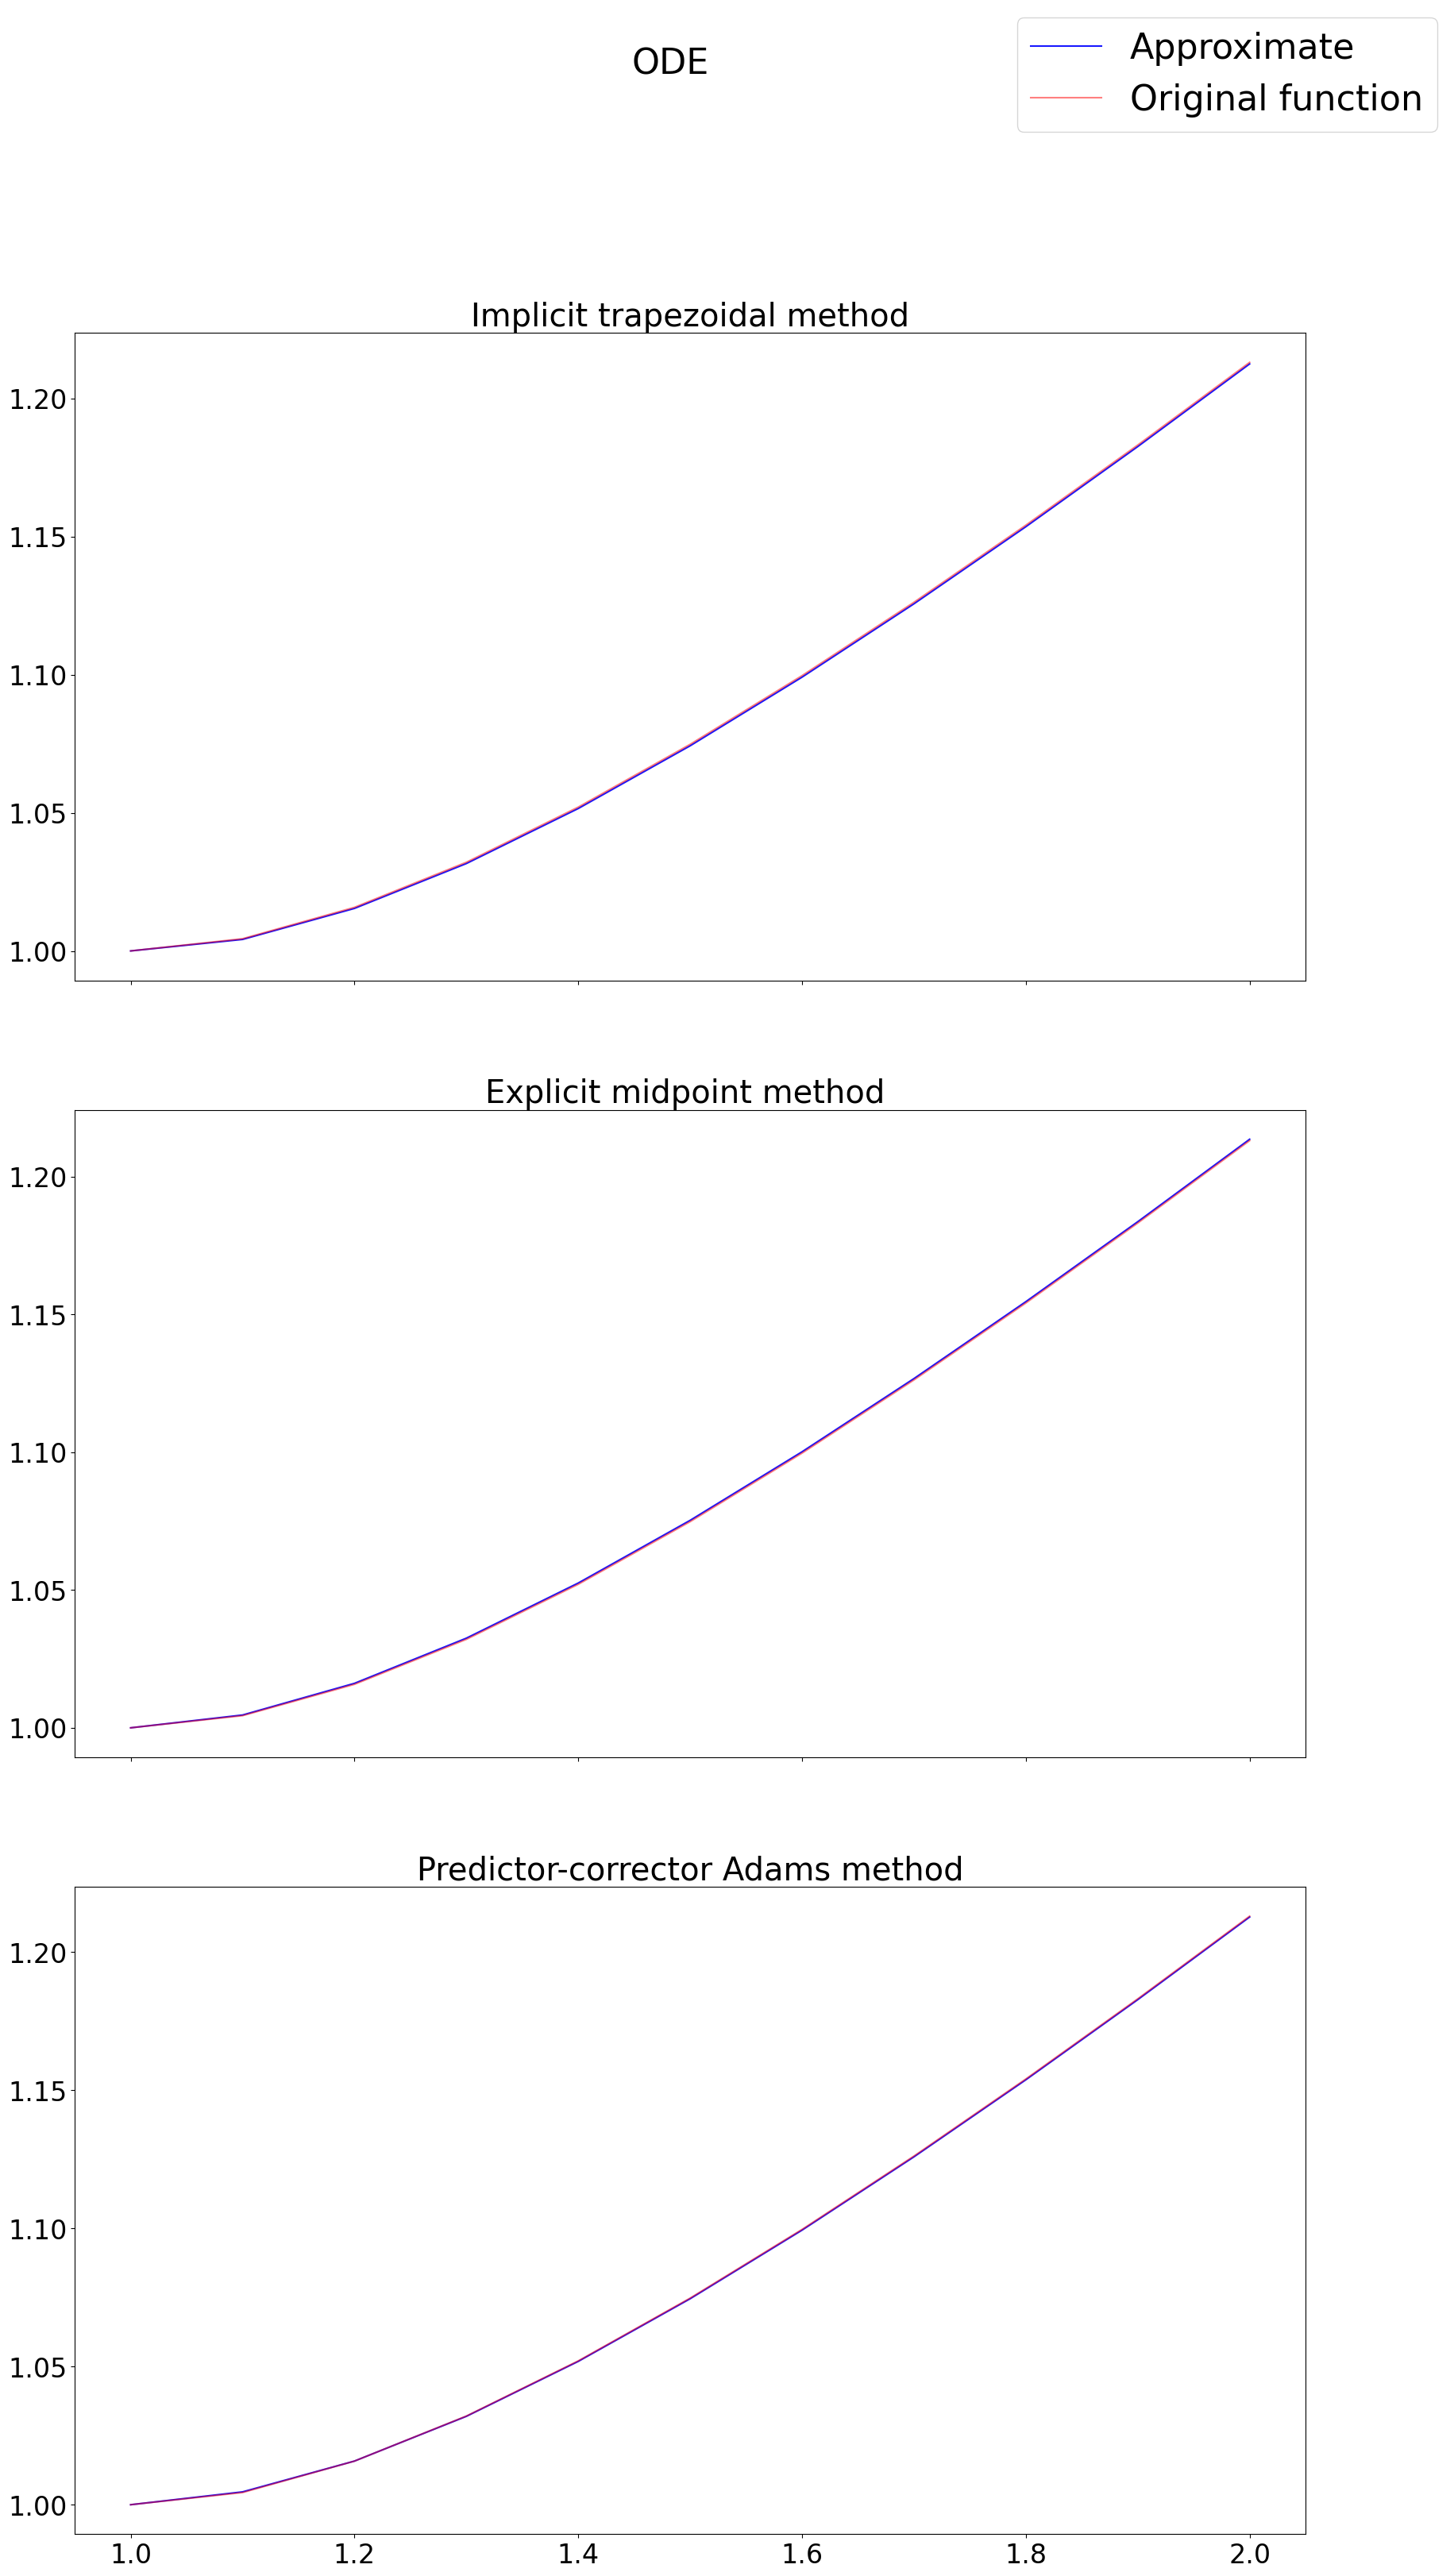

In [12]:
fig, axis = plt.subplots(3,1, sharex = True)
fig.suptitle("ODE", fontsize = 32)
fig.set_size_inches(20,36)
paintGraph(axis[0], 1)
paintGraph(axis[1], 2)  
paintGraph(axis[2], 3)
axis[0].set_title("Implicit trapezoidal method")
axis[1].set_title("Explicit midpoint method ")
axis[2].set_title("Predictor-corrector Adams method")
lines, labels = axis[0].get_legend_handles_labels() 
fig.legend(lines, labels, fontsize = 32)
#fig.savefig("ordinary_differential_equations.png", dpi = 200)

## Приведение таблицы решений к итоговому виду

In [ ]:
#solution = solution.drop("f(x,y)", axis = 1)
solution.loc["Runge", :] = RungeErr
solution.loc["Error", :] = np.array([np.NAN, np.NAN, E1, E2, E3])
solution.index.name = "i"
#solution.to_excel("ODE.xlsx")
solution